In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv("/content/drive/MyDrive/Heart Disease/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Checking if there's a null values on every column.

#Since There is Null Values on the data. There's no reason for cleaning the data. We Can Start the analyzation.

In [ ]:
df.groupby("target").agg(["min", "max", "mean"])

age                sex                cp               trestbps  ...  \
       min max       mean min max      mean min max      mean      min  ...   
target                                                                  ...   
0       35  77  56.601449   0   1  0.826087   0   3  0.478261      100  ...   
1       29  76  52.496970   0   1  0.563636   0   3  1.375758       94  ...   

         oldpeak slope                ca               thal                
            mean   min max      mean min max      mean  min max      mean  
target                                                                     
0       1.585507     0   2  1.166667   0   4  1.166667    0   3  2.543478  
1       0.583030     0   2  1.593939   0   4  0.363636    0   3  2.121212  

[2 rows x 39 columns]

In [ ]:
df.groupby("target").min()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,35,0,0,100,131,0,0,71,0,0.0,0,0,0
1,29,0,0,94,126,0,0,96,0,0.0,0,0,0


<Axes: >

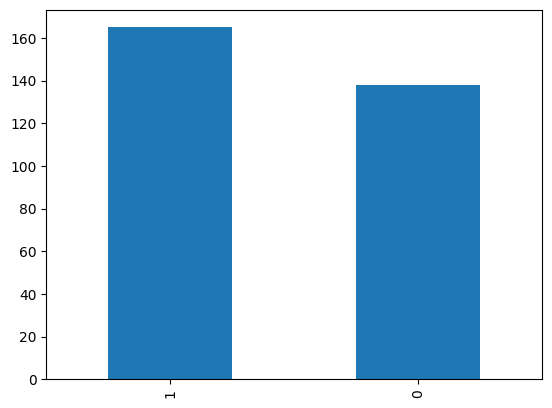

In [ ]:
df.target.value_counts().plot(kind="bar")

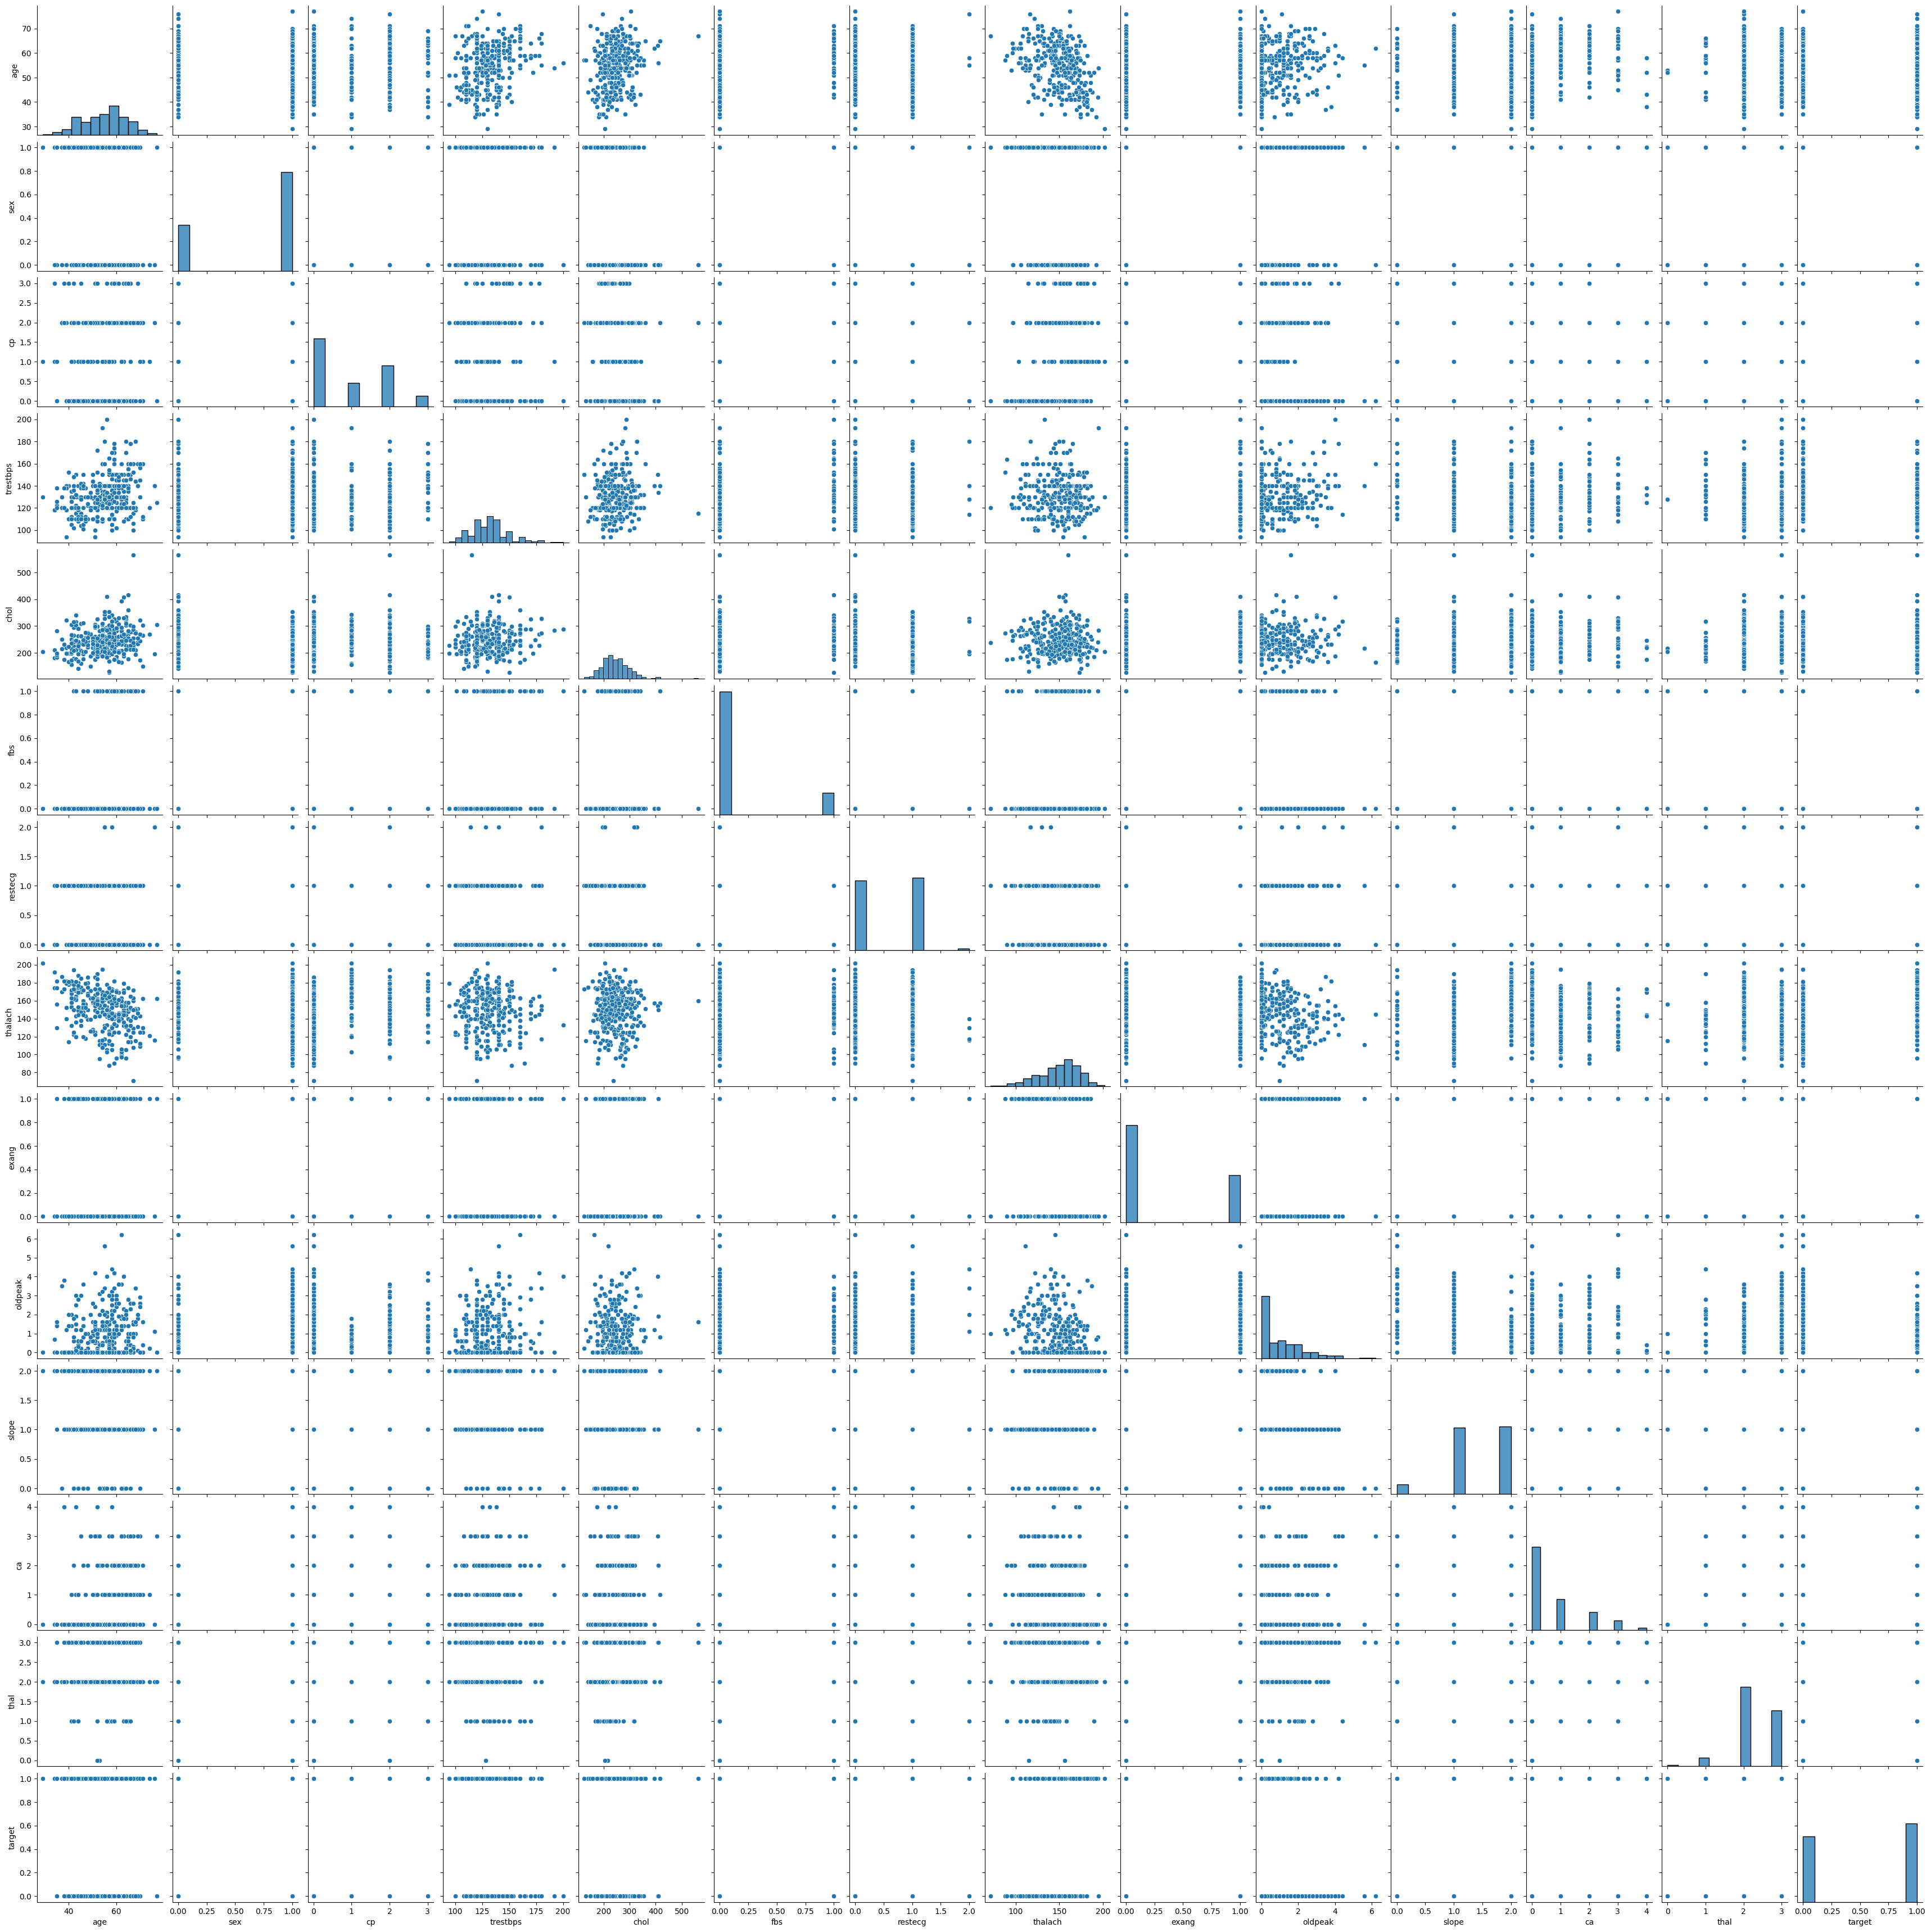

In [ ]:
sns.pairplot(data = df )

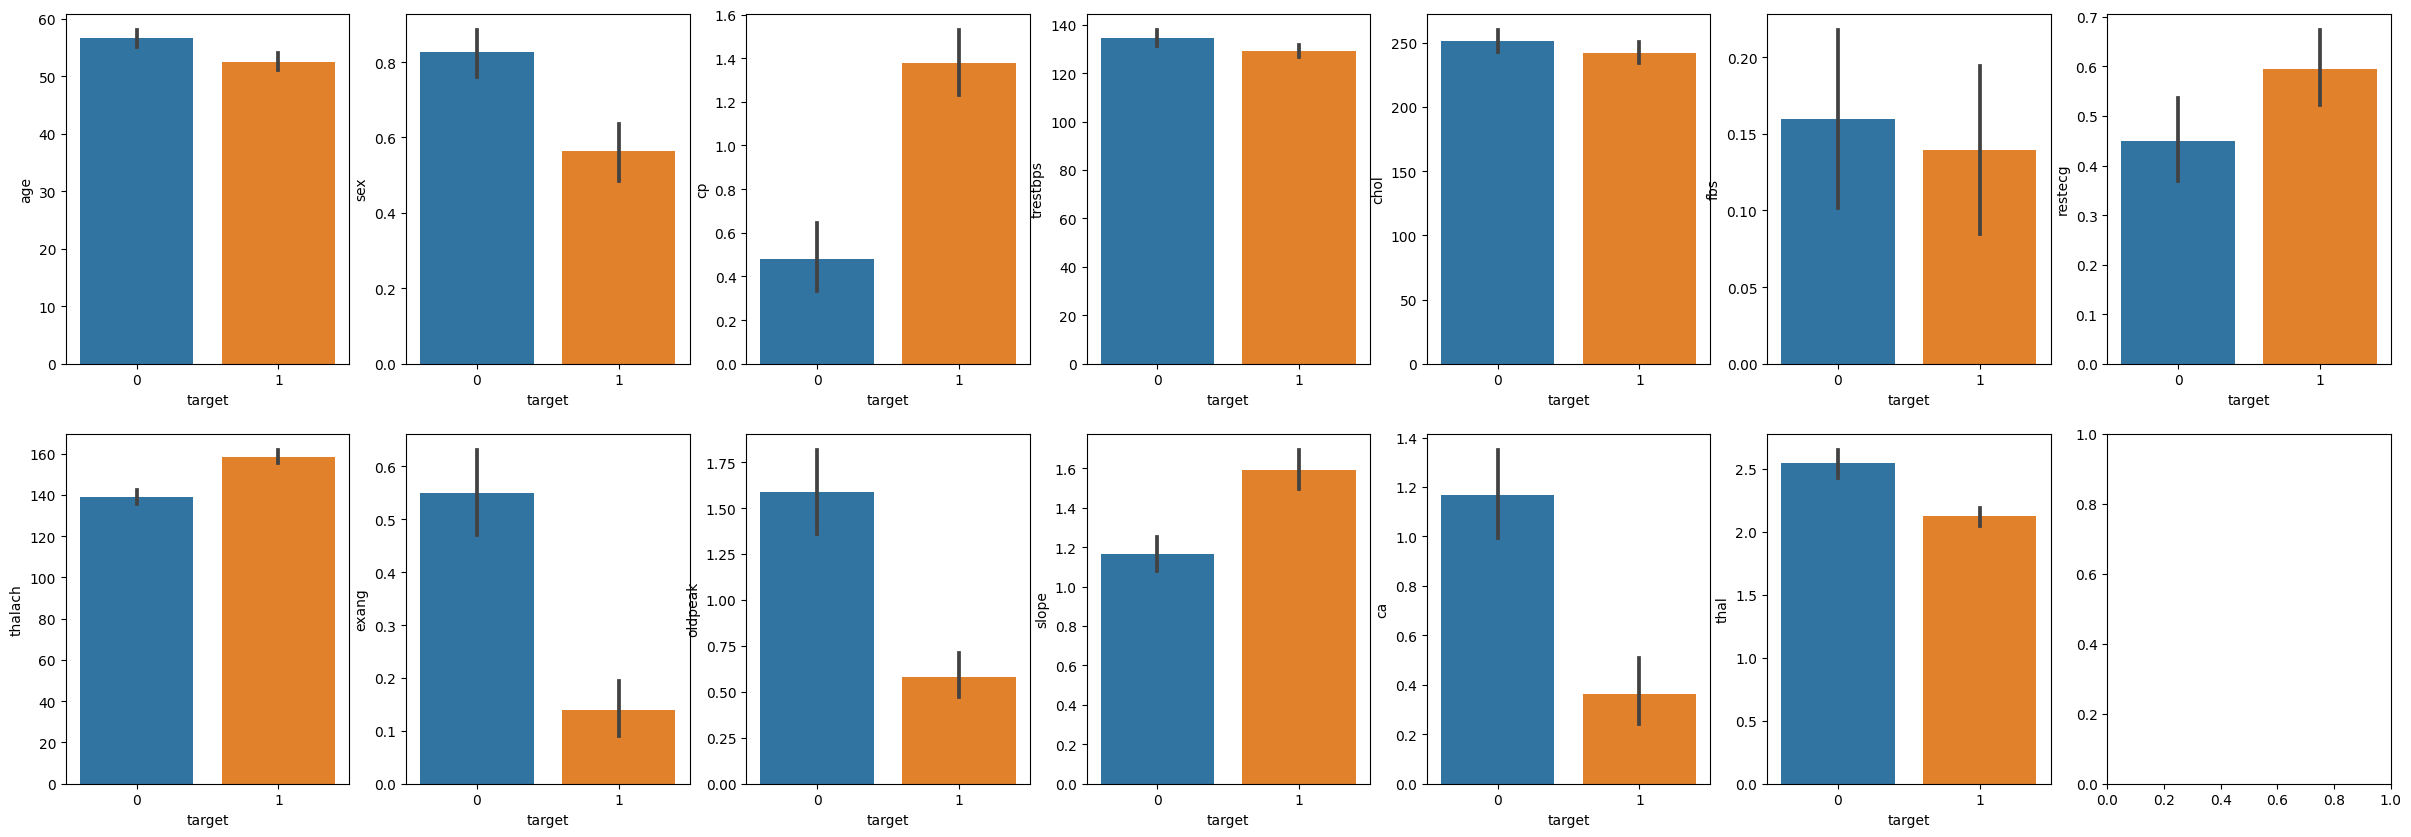

In [ ]:
columns = df.columns[:-1]
col = 0
row = 0
fig, axes = plt.subplots(2,7, figsize = (30,10))

for i in columns:
  sns.barplot(data = df, x = "target", y = i, ax = axes[row, col])
  col += 1
  if col == 7:
    row += 1
    col = 0

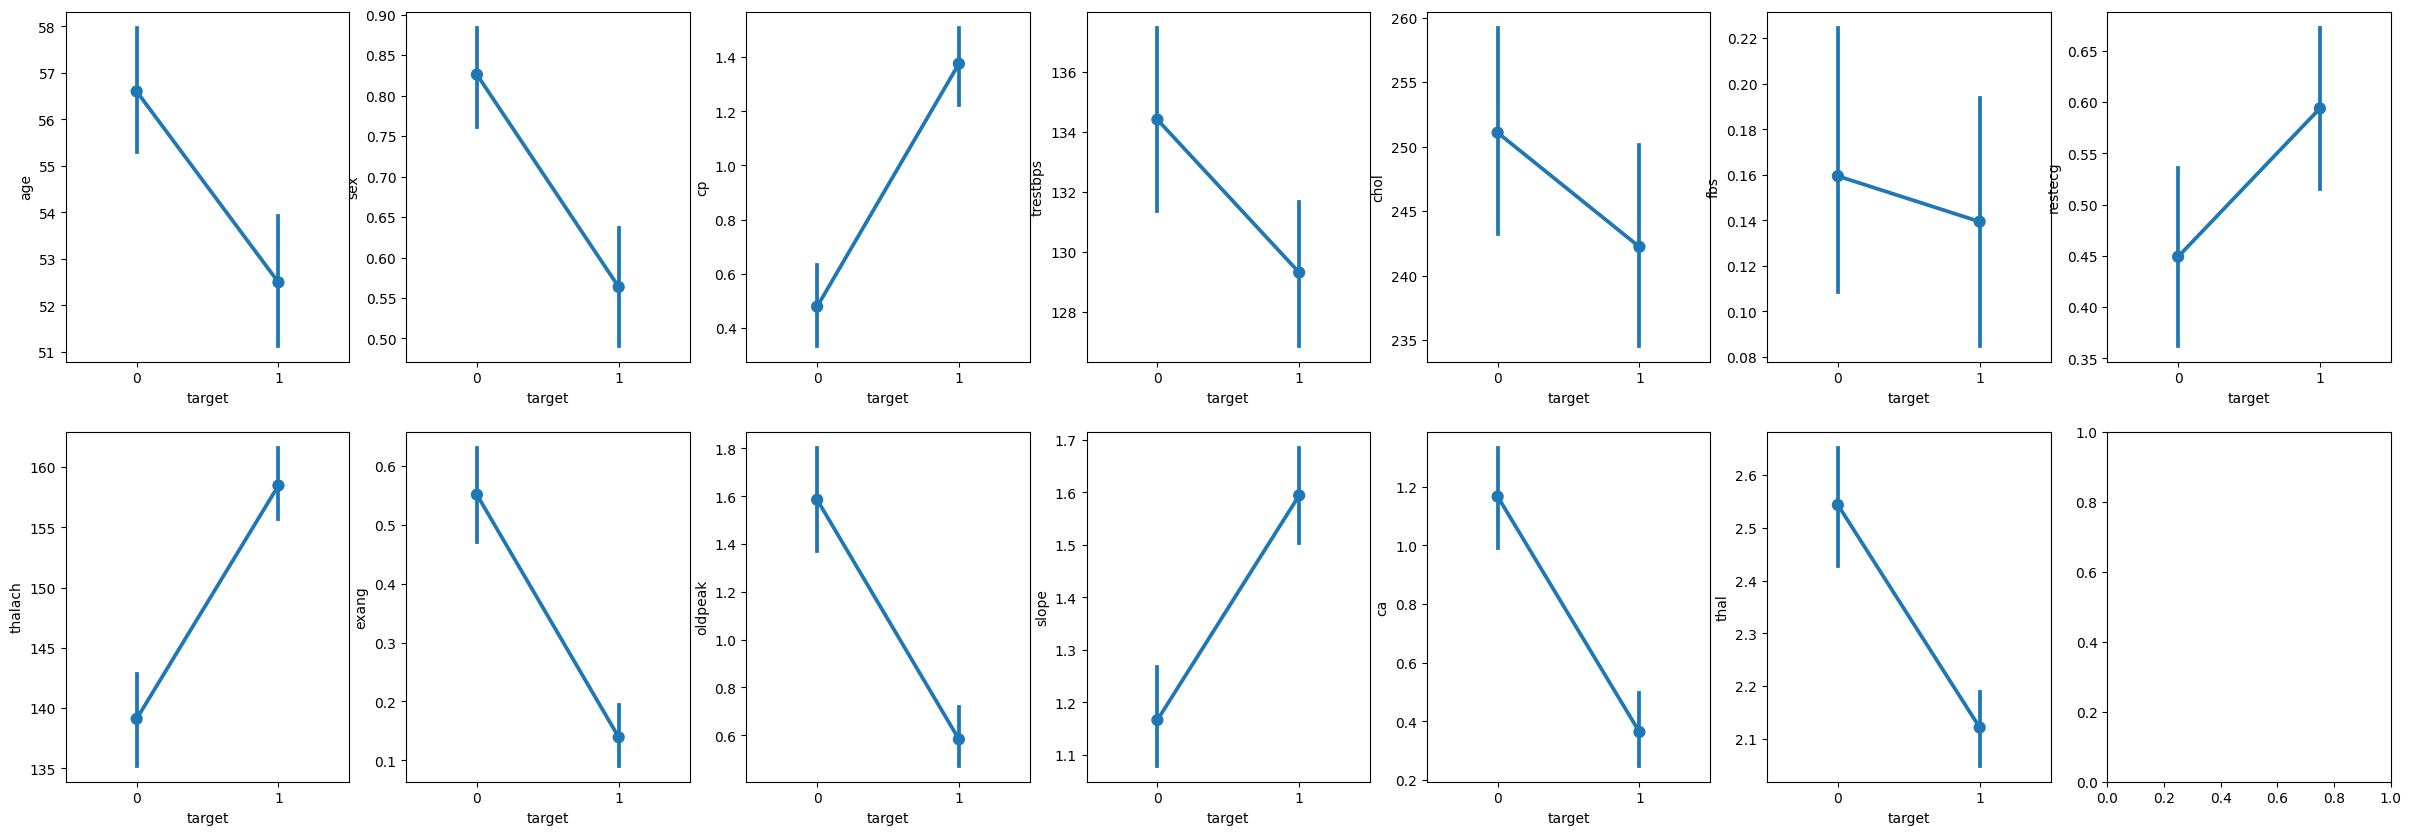

In [ ]:
col = 0
row = 0
fig, axes = plt.subplots(2,7, figsize = (30,10))

for i in columns:
  sns.pointplot(data = df, x = "target", y = i, ax = axes[row, col])
  col += 1
  if col == 7:
    row += 1
    col = 0

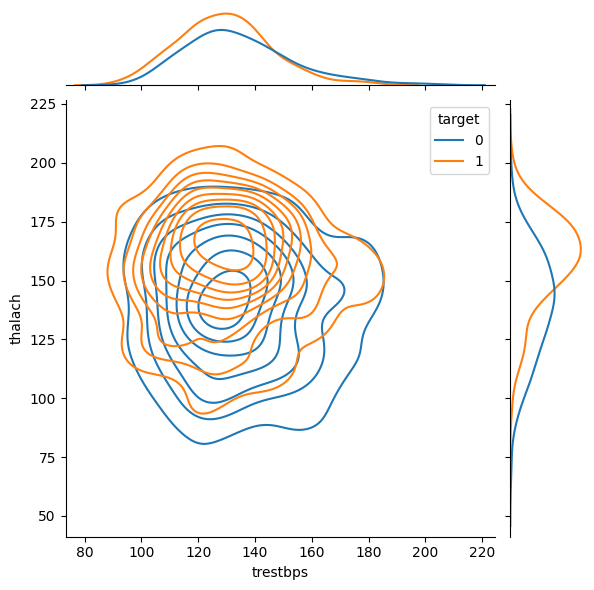

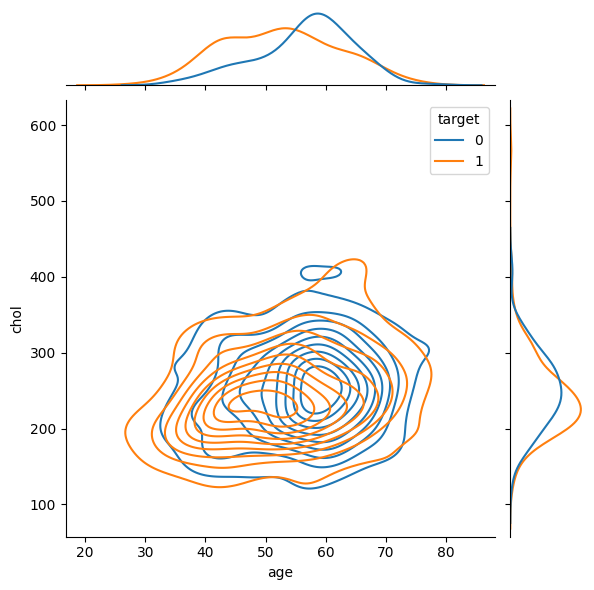

In [ ]:
sns.jointplot(data = df, x = "trestbps", y = "thalach", hue = "target", kind = "kde")
sns.jointplot(data = df , x = "age", y = "chol", hue = "target", kind= "kde")

## Analyzing if the dependent variable is correlated to the independent variable

<Axes: >

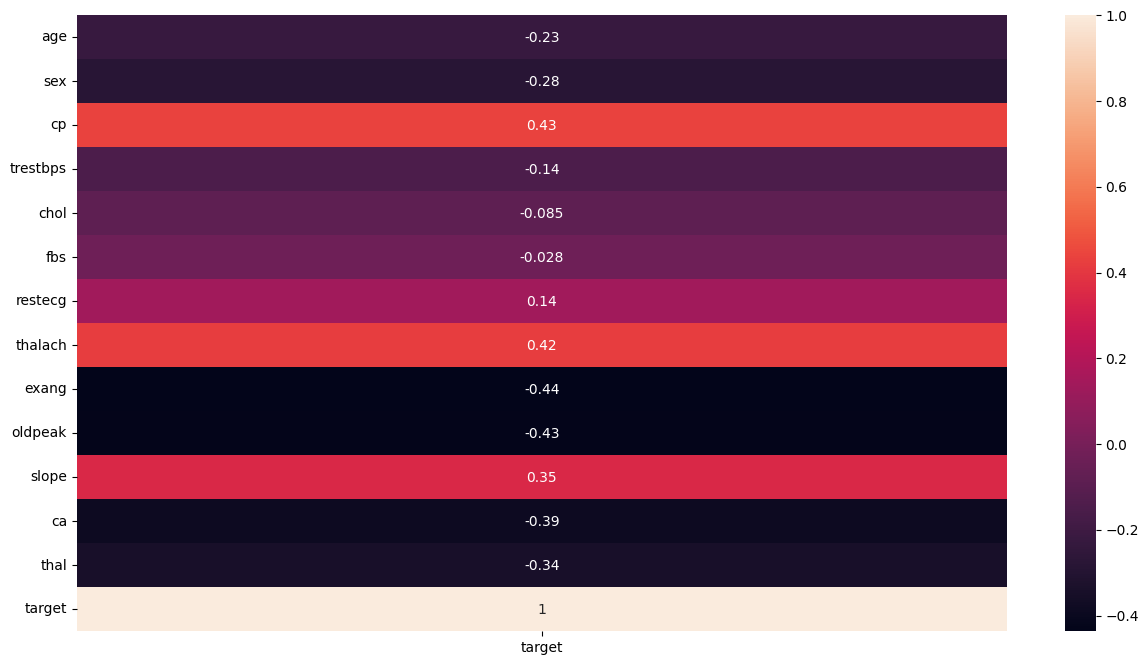

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr()[["target"]], annot = True)

# Let see first if the accuracy is still high even if we don't remove all the independent variables that is not correlated to the dependent.

# Going to use two different models which is RandomForestClassifier or Logistic Regression. And we're going what model works better on our data.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Splitting the data. We need to have a train data and a test data.

In [4]:
X = df.drop("target", axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# model = RandomForestClassifier(n_estimators = 300, min_samples_split=100)

# Training the data

In [ ]:
model.fit(X_train, y_train)
cross_val_score(model, X, y, cv = 5), cross_val_score(model, X, y, cv = 5).mean()

(array([0.83606557, 0.86885246, 0.85245902, 0.85      , 0.73333333]),
 0.8381967213114754)

# Using the model to predict all the test data.

In [ ]:
y_preds = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob_positive = y_prob[:,1]

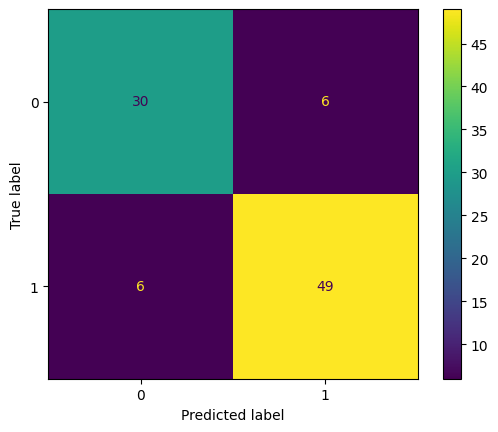

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

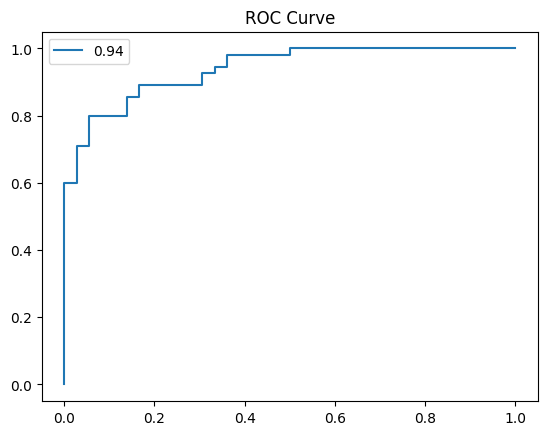

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_prob_positive)
auc_score = roc_auc_score(y_test, y_prob_positive)
plt.title("ROC Curve")
plt.plot(fpr, tpr, label = np.round(auc_score, 2))
plt.legend()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.89      0.89      0.89        55

    accuracy                           0.87        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91



# Fine tuning the data using GridSearchCV

In [ ]:
n_parameters = {
    "n_estimators": np.arange(100, 500, 100),
    "max_depth": np.arange(0,100,10),
    "min_samples_split":np.arange(2, 20, 4),
    "min_samples_leaf": np.arange(2,20,4)
}

param_clf = GridSearchCV(estimator = model, param_grid = n_parameters, cv = 2, verbose = 1, scoring = "accuracy")
param_clf.fit(X_train, y_train)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(min_samples_split=100,
                                              n_estimators=300),
             param_grid={'max_depth': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='accuracy', verbose=1)

In [ ]:
param_clf.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=18)

In [ ]:
param_clf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 18,
 'n_estimators': 100}

In [ ]:
param_clf.best_score_

0.8301886792452831

In [ ]:
model = RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=18, n_estimators = 700)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8681318681318682

In [ ]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        48
           1       0.83      0.91      0.87        43

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



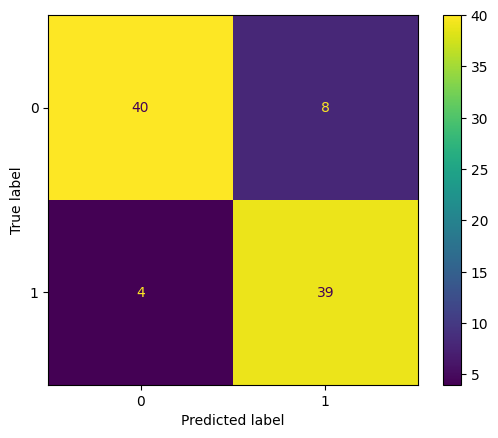

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

# Almost the same accuracy even if use the GridSearchCV

# Now let's try to use logistic Regression as our model

In [ ]:
model = LogisticRegression(solver = "lbfgs",  max_iter = 1000)
model.fit(X_train, y_train)
crossvalmean = cross_val_score(model, X, y, cv = 5)
crossvalmean, crossvalmean.mean()

(array([0.80327869, 0.86885246, 0.85245902, 0.86666667, 0.75      ]),
 0.8282513661202187)

# As you can see using logistic regression has lower accuracy than using RandomForestClassifier

Let's first see the ROC Curve and the AUC score

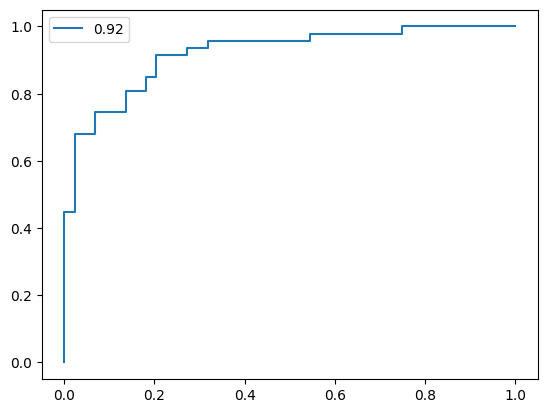

In [ ]:
y_preds = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_probs_positive = y_prob[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_probs_positive)
auc_score = roc_auc_score(y_test, y_probs_positive)
plt.plot(fpr, tpr, label = np.round(auc_score, 2))
plt.legend()

The Confusion Matrix or error Matrix

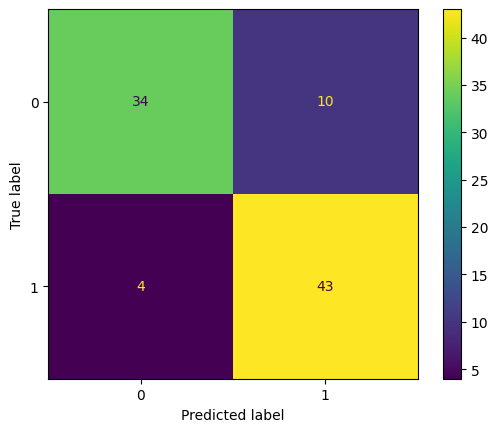

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

And the Classification Report

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



And RandomForestClassifiers works better than LogisticRegression. However, Logistic has higher precision on 0 than randomforest while forest has higher precision on detecting 1 that logistic, but overall Randomforest has higher accuracy than logistic.

Now let's try RandomizeSearchCv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_parameters = {
    "max_iter": np.arange(1000, 5000,100),
    "tol":np.logspace(-2, 2, 25),
    "C":np.linspace(1,5,10),
    "warm_start": [True, False],
    "solver":["lbfgs"],
}

param_model = RandomizedSearchCV(model, param_distributions=n_parameters, n_iter =100, cv = 50)
param_model.fit(X_train, y_train)

RandomizedSearchCV(cv=50,
                   estimator=LogisticRegression(C=2.333333333333333,
                                                max_iter=3700,
                                                tol=4.6415888336127775),
                   n_iter=100,
                   param_distributions={'C': array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
                                        'max_iter': array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
       2100, 2200, 2300, 2400, 2500, 2...
                                        'tol': array([1.00000000e-02, 1.46779927e-02, 2.15443469e-02, 3.16227766e-02,
       4.64158883e-02, 6.81292069e-02, 1.00000000e-01, 1.46779927e-01,
       2.15443469e-01, 3.16227766e-01, 4.64158883e-01, 6.81292069e-01,
       1.00000000e+00, 1.46779927e+00, 2.15443469e+00, 3.16227766e+00,
       4.64158883e+00, 6.81292069e+00, 1.00000000e+01, 1.46779927e+01,
       2.15443469e+01, 3.16227766e+01, 4.64158883e+01, 6.81292069e+01,
       1.00000000e+02]),
                                        'warm_start': [True, False]})

In [ ]:
model = param_model.best_estimator_

In [ ]:
param_model.best_score_

0.843

In [ ]:
param_model.best_params_

{'warm_start': False,
 'tol': 4.6415888336127775,
 'solver': 'lbfgs',
 'max_iter': 4300,
 'C': 4.555555555555555}

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=4.555555555555555, max_iter=4300, tol=4.6415888336127775)

In [ ]:
model.score(X_test, y_test)

0.8681318681318682

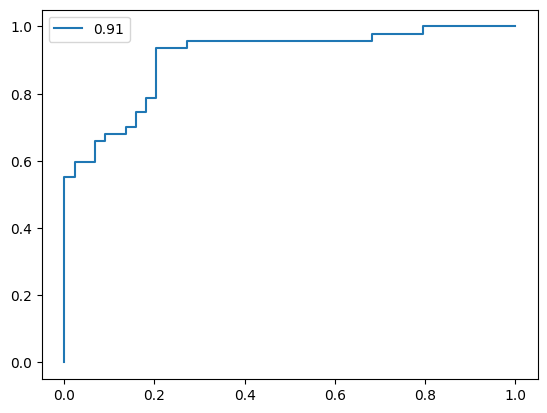

In [ ]:
y_preds = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_probs_positive = y_prob[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_probs_positive)
auc_score = roc_auc_score(y_test, y_probs_positive)
plt.plot(fpr, tpr, label = np.round(auc_score, 2))
plt.legend()

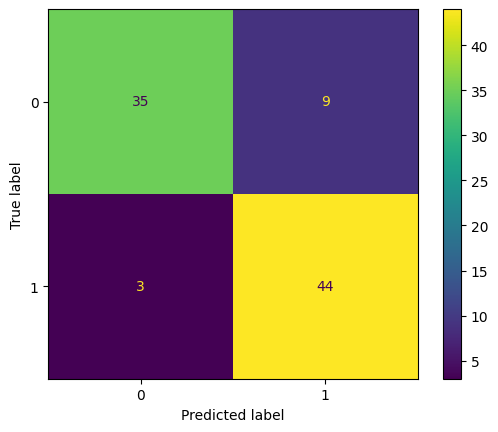

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# Therefore, both model almost have the same results. So we can either use both model but it still depends on how you tune the model. If I increase the cv maybe the score wiil goes up.

# Now we're going to remove all of the independent variables that doesn't correlates with the dependent variables.

<Axes: >

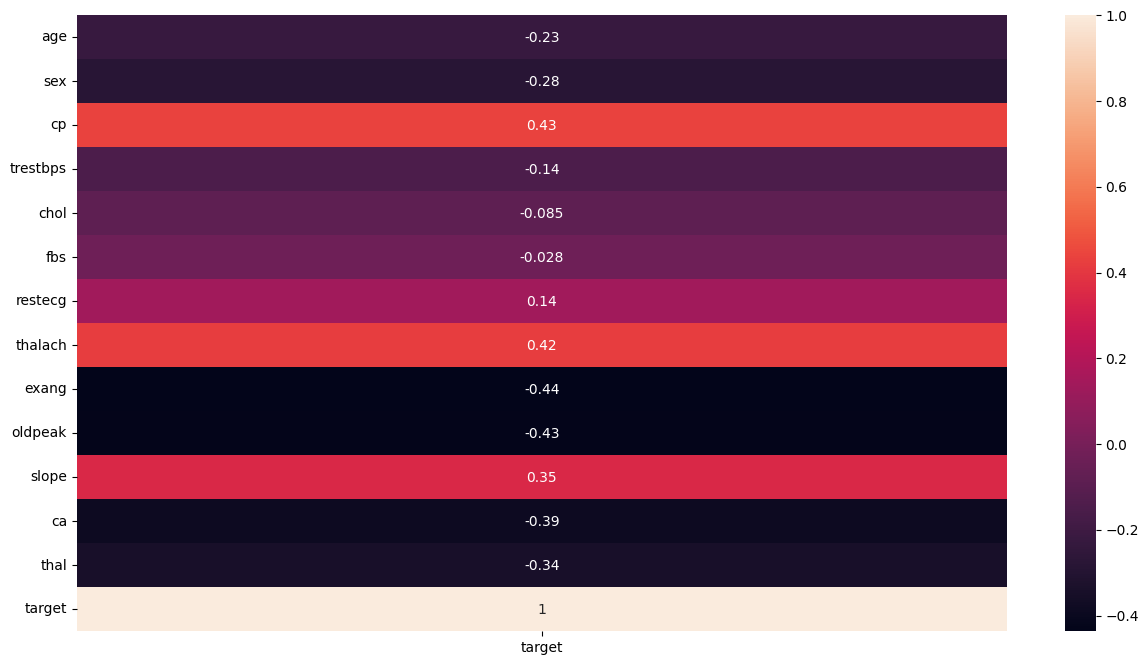

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr()[["target"]], annot = True)

# All of the columns that is less than 0.30 must be drop

In [ ]:
drop_column = ["age", "sex", "trestbps", "chol", "fbs", "restecg"]
df_drops = df.drop(labels = drop_column, axis = 1)

In [ ]:
df_drops

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,3,150,0,2.3,0,0,1,1
1,2,187,0,3.5,0,0,2,1
2,1,172,0,1.4,2,0,2,1
3,1,178,0,0.8,2,0,2,1
4,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...
298,0,123,1,0.2,1,0,3,0
299,3,132,0,1.2,1,0,3,0
300,0,141,0,3.4,1,2,3,0
301,0,115,1,1.2,1,1,3,0


In [ ]:
X = df_drops.drop("target", axis = 1)
y = df_drops.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
model.fit(X_train, y_train)
cross_val = cross_val_score(model, X, y, cv = 10)
cross_val, cross_val.mean()

(array([0.87096774, 0.80645161, 0.83870968, 0.93333333, 0.86666667,
        0.8       , 0.9       , 0.86666667, 0.7       , 0.7       ]),
 0.8282795698924732)

In [ ]:
y_preds = model.predict(X_test)


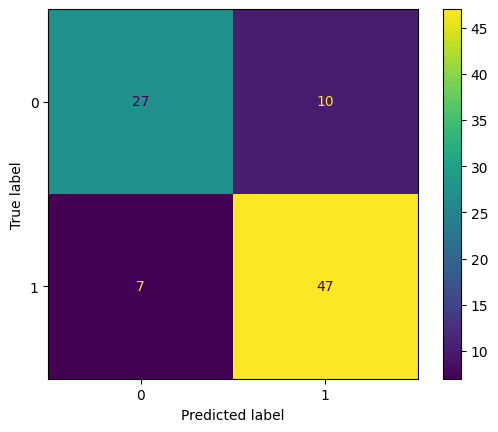

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        37
           1       0.82      0.87      0.85        54

    accuracy                           0.81        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
n_parameters2 = {
    "n_estimators": np.arange(100, 1000, 100),
    "min_samples_split": np.arange(1,10),
    "max_depth": np.arange(100, 1000, 100),
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_leaf":np.arange(1,10)
}
param_clf2 = RandomizedSearchCV(RandomForestClassifier(), param_distributions = n_parameters2, n_iter = 25, cv = 10, verbose = 0,n_jobs = -1 )
param_clf2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [ ]:
model = param_clf2.best_estimator_

In [ ]:
param_clf2.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 200}

In [ ]:
param_clf2.best_score_

0.8489177489177487

In [ ]:
def roc_curve(y_test, y_probs):
  fpr, tpr, thresh = roc_curve(y_test, y_probs)
  auc_score = roc_auc_score(y_test, y_probs)
  plt.plot(fpr, tpr, label = np.round(auc_score, 2))
  plt.legend()

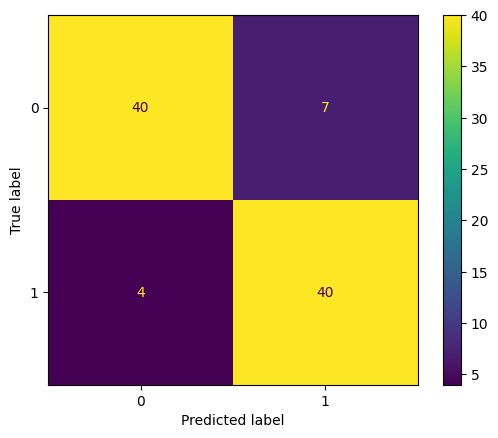

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        47
           1       0.85      0.91      0.88        44

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



# We're going to test it out on deep learning if this works out better.

In [7]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_dim = len(X_train.columns), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation = "relu" ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, batch_size = 32)


Epoch 1/500
7/7 [==============================] - 3s 86ms/step - loss: 17.0674 - accuracy: 0.5189 - val_loss: 2.8107 - val_accuracy: 0.6374
Epoch 2/500
7/7 [==============================] - 0s 14ms/step - loss: 8.5606 - accuracy: 0.5755 - val_loss: 2.5535 - val_accuracy: 0.5495
Epoch 3/500
7/7 [==============================] - 0s 13ms/step - loss: 4.2859 - accuracy: 0.5425 - val_loss: 1.4572 - val_accuracy: 0.6703
Epoch 4/500
7/7 [==============================] - 0s 24ms/step - loss: 3.0565 - accuracy: 0.5519 - val_loss: 0.7842 - val_accuracy: 0.5824
Epoch 5/500
7/7 [==============================] - 0s 14ms/step - loss: 2.1025 - accuracy: 0.5236 - val_loss: 0.9187 - val_accuracy: 0.5934
Epoch 6/500
7/7 [==============================] - 0s 17ms/step - loss: 1.3919 - accuracy: 0.5896 - val_loss: 0.5837 - val_accuracy: 0.7363
Epoch 7/500
7/7 [==============================] - 0s 17ms/step - loss: 1.3116 - accuracy: 0.5660 - val_loss: 0.5523 - val_accuracy: 0.7363
Epoch 8/500
7/7 [==

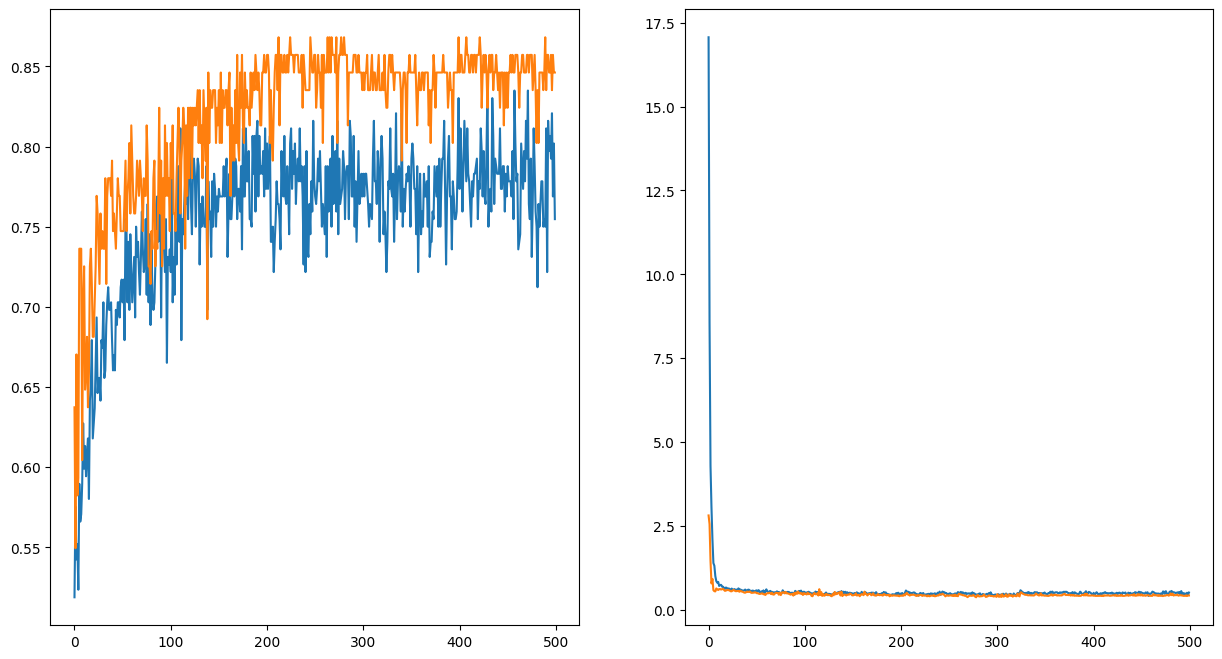

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
axes[0].plot(r.history["accuracy"])
axes[0].plot(r.history["val_accuracy"])
axes[1].plot(r.history["loss"])
axes[1].plot(r.history["val_loss"])

In [ ]:
y_preds = model.predict(X_test)
preds = [1 if i > 0.5 else 0 for i in y_preds]

3/3 [==============================] - 0s 4ms/step


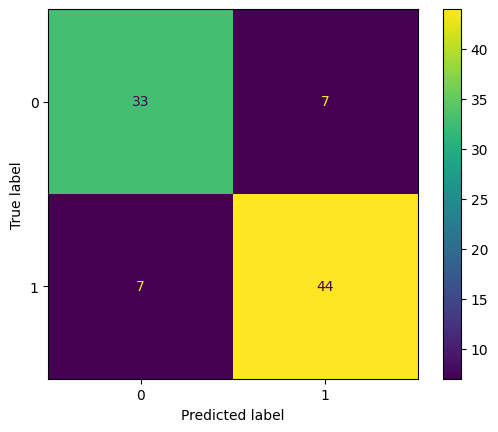

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        40
           1       0.86      0.86      0.86        51

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



# As you can see on the classification report above the deep learning works better than the other model that haven't yet fine tuned. Now we're going to search for the best parameters.

In [5]:
def create_model(hidden, probs, lr, num_epochs, bs):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(hidden, input_dim = len(X_train.columns), activation = "relu"),
      tf.keras.layers.Dropout(probs),
      tf.keras.layers.Dense(hidden, activation = "relu"),
      tf.keras.layers.Dropout(probs),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])
  model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
  model.fit(X_train, y_train , epochs = num_epochs, batch_size = bs, verbose = 0)
  report = model.evaluate(X_test, y_test)
  return report


In [8]:
hidden = [16, 32, 64]
probs = np.linspace(0, 0.5, 3)
lr = np.linspace(0.01, 0.1, 3)
num_epochs = np.arange(300, 500, 100)
bs = [16,32]
best_param = {
  "hidden": 0,
  "probs": 0,
  "lr": 0,
  "num_epochs": 0,
  "batch_size": 0
}
best_acc = 0
all_Loss = []
all_Acc = []
for hid in hidden:
  for prob in probs:
    for x in lr:
      for epochs in num_epochs:
        for b in bs:
          loss, accuracy = create_model(hid, prob, x, epochs, b)
          all_Loss.append(loss)
          all_Acc.append(accuracy)
          if best_acc < accuracy:
            best_acc = accuracy
            best_param["hidden"] = hid
            best_param["probs"] = prob
            best_param["lr"] = x
            best_param["num_epochs"] = epochs
            best_param["batch_size"] = b

3/3 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.9121


3/3 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5165


3/3 [==============================] - 0s 9ms/step - loss: 0.6940 - accuracy: 0.5165


In [12]:
best_acc, best_param

(0.9120879173278809,
 {'hidden': 16, 'probs': 0.0, 'lr': 0.01, 'num_epochs': 400, 'batch_size': 32})

[Text(0.5, 1.0, 'Accuracy Plot'),
 Text(0.5, 0, 'Number of iteration'),
 Text(0, 0.5, 'Accuracy')]

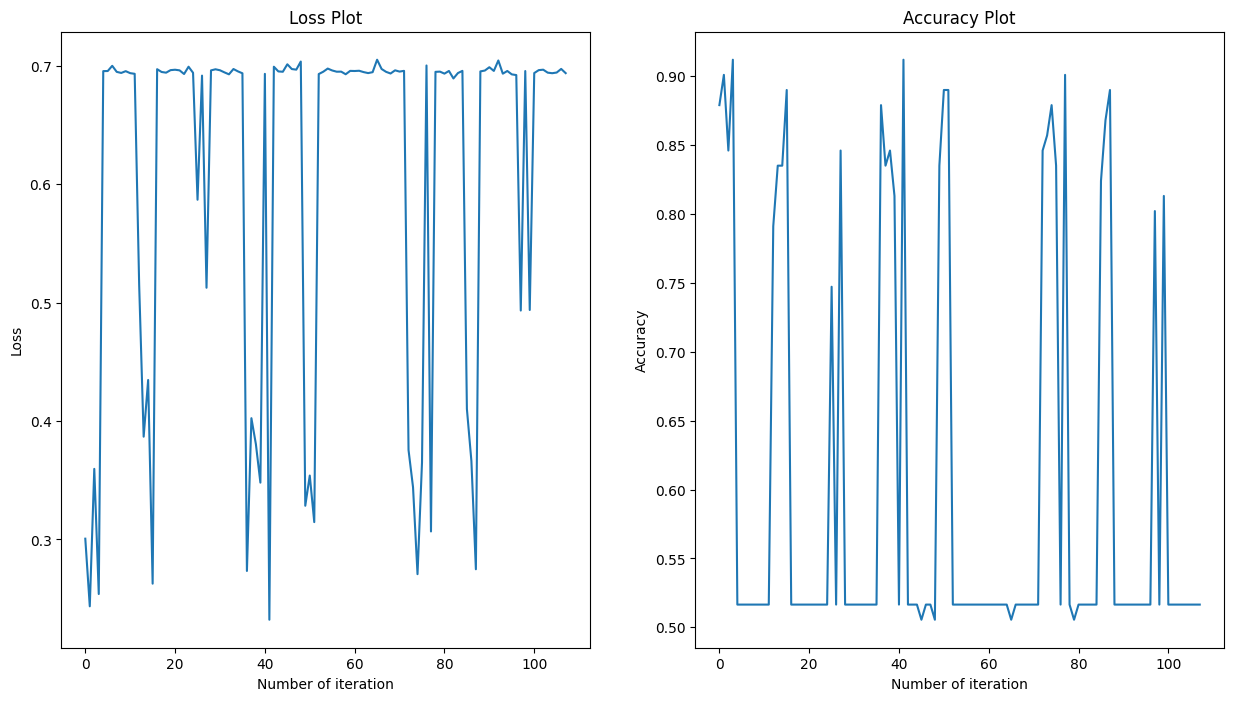

In [38]:
fig,axes = plt.subplots(1,2, figsize = (15,8))
axes[0].plot(all_Loss)
axes[0].set(title = "Loss Plot", xlabel = "Number of iteration", ylabel = "Loss")
axes[1].plot(all_Acc)
axes[1].set(title = "Accuracy Plot", xlabel = "Number of iteration", ylabel = "Accuracy")

# So lets try to apply the best parameters now to check if it really works and let's randomize another train data and test data again.

In [28]:
df = df.sample(frac = 1)
# Going to check create a test data in order to check if the model is overfitting.
df_test = df[250:]
X_test, y_test = df_test.drop("target", axis = 1), df_test.target


X = df.drop("target", axis = 1)
y = df.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [20]:
best_param

{'hidden': 16, 'probs': 0.0, 'lr': 0.01, 'num_epochs': 400, 'batch_size': 32}

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim = len(X_train.columns), activation = "relu"),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
r = model.fit(X_train, y_train, epochs = 400, validation_data = (X_val, y_val), batch_size = 32)


Epoch 1/400
7/7 [==============================] - 2s 56ms/step - loss: 12.7799 - accuracy: 0.5047 - val_loss: 4.1745 - val_accuracy: 0.5934
Epoch 2/400
7/7 [==============================] - 0s 15ms/step - loss: 2.6507 - accuracy: 0.5425 - val_loss: 2.1886 - val_accuracy: 0.4505
Epoch 3/400
7/7 [==============================] - 0s 13ms/step - loss: 1.2459 - accuracy: 0.5377 - val_loss: 0.6013 - val_accuracy: 0.6923
Epoch 4/400
7/7 [==============================] - 0s 13ms/step - loss: 0.7792 - accuracy: 0.6321 - val_loss: 0.5866 - val_accuracy: 0.6923
Epoch 5/400
7/7 [==============================] - 0s 13ms/step - loss: 0.7306 - accuracy: 0.6321 - val_loss: 0.5823 - val_accuracy: 0.6813
Epoch 6/400
7/7 [==============================] - 0s 11ms/step - loss: 0.6862 - accuracy: 0.6368 - val_loss: 0.6083 - val_accuracy: 0.6813
Epoch 7/400
7/7 [==============================] - 0s 12ms/step - loss: 0.6771 - accuracy: 0.6321 - val_loss: 0.6220 - val_accuracy: 0.6593
Epoch 8/400
7/7 [==

# The chart belows depict that the loss between the train data and validation data have no difference at all likewise to its accuracy.

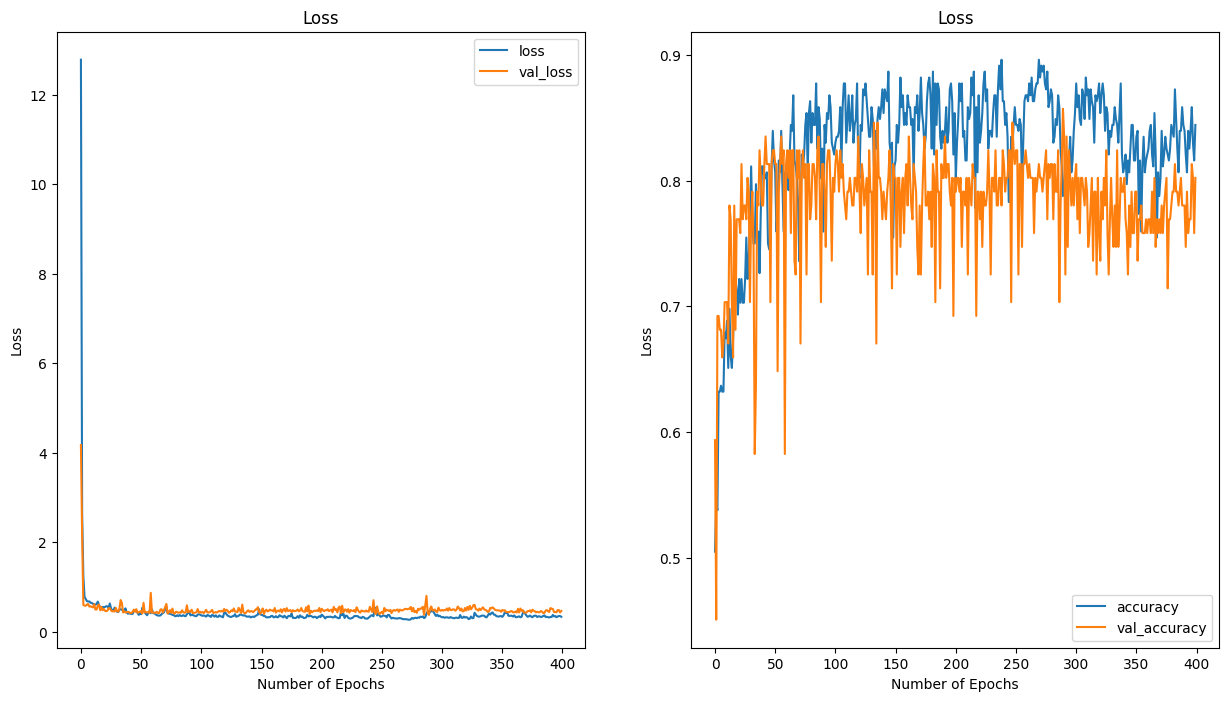

In [45]:
fig, axes = plt.subplots(1,2, figsize = (15,8))
axes[0].plot(r.history["loss"], label = "loss")
axes[0].plot(r.history["val_loss"], label = "val_loss")
axes[0].set(title = "Loss", xlabel = "Number of Epochs", ylabel = "Loss")
axes[0].legend()

axes[1].plot(r.history["accuracy"], label = "accuracy")
axes[1].plot(r.history["val_accuracy"], label = "val_accuracy")
axes[1].set(title = "Loss", xlabel = "Number of Epochs", ylabel = "Loss")
axes[1].legend()

# So I'm going to try it on the test data to check if it overfits or it doesn't

In [40]:
y_preds = model.predict(X_test)
preds = [1 if i > 0.5 else 0 for i in y_preds]

2/2 [==============================] - 0s 9ms/step


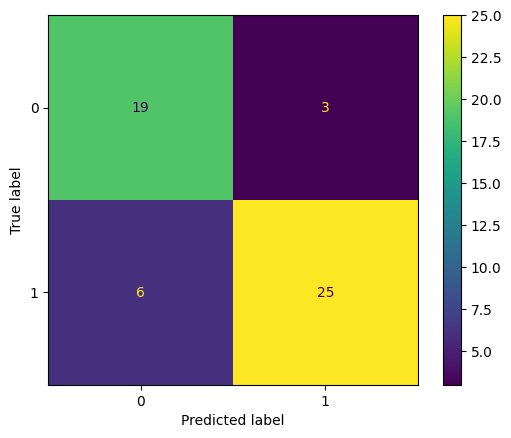

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [44]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.89      0.81      0.85        31

    accuracy                           0.83        53
   macro avg       0.83      0.84      0.83        53
weighted avg       0.84      0.83      0.83        53



# Therefore, it doesn't give us a best result maybe due to the split of data. The model only got a 83% accuracy unlike the randomforestclassifier."

# To Conclude
  - It is better to use RandomForestClassifier as the model since it's non-linearity.
  - Remove all the variables that's not correlated to the dependent variables.
  - Use RandomizedSearchCV for faster and effectient hyperparameter tuning.
  - You can use deep learning for this but make sure to tune the model meticulously.